### bikeShare
[bikeShare](https://www.kaggle.com/c/bike-sharing-demand)
text없고 encoding 되어 있어서 분석하는 맛이 있는 데이터. 대여 개수가 얼마나 되냐

In [2]:
import pandas as pd

casual: 비 회원 대여량
registered: 회원 대여량

In [3]:
train= pd.read_csv("data/train.csv", parse_dates=["datetime"])
test= pd.read_csv("data/test.csv", parse_dates=["datetime"])

In [4]:
print(train.shape)
print(test.shape)
print(train.head())
print(test.head())

(10886, 12)
(6493, 9)
             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-02-07 08:00:00       1        0           1        2  6.56  11.365   
1 2011-02-05 06:00:00       1        0           0        3  8.20  12.880   
2 2011-02-02 10:00:00       1        0           1        2  9.02  13.635   
3 2011-02-05 14:00:00       1        0           0        3  9.02  13.635   
4 2011-02-05 15:00:00       1        0           0        3  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0       100        0.0       7         223    230  
1       100        0.0       0           4      4  
2       100        0.0       2          59     61  
3       100        0.0       5          50     55  
4       100        0.0      11          49     60  
             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0         

### 시각화- datetime중에 뭐가 적절할까?

[seaborn](http://seaborn.pydata.org/)

In [53]:
# trainEx= pd.read_csv("data/train_try4.csv", parse_dates=["datetime"])
trainEx= pd.read_csv("data/train_try5.csv", parse_dates=["datetime","datetime_YM"])

type(trainEx)

pandas.core.frame.DataFrame

In [11]:
# # 한 번만 실행

# %matplotlib inline
# import numpy as np
# from scipy import stats, integrate
# import matplotlib.pyplot as plt
# import seaborn as sns

In [20]:
sns.set(style="whitegrid",color_codes= True)

In [21]:
np.random.seed(sum(map(ord,"categorical")))

In [ ]:
# np.random.seed(sum(map(ord,"distributions")))
# x= np.random.normal(size=100)
# sns.distplot(x)

In [ ]:
# seeTr= pd.DataFrame(train, columns=["datetime"])

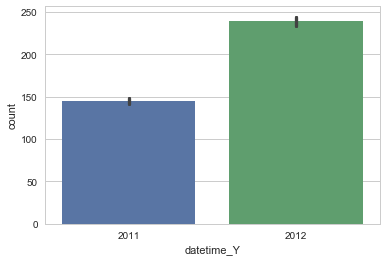

In [34]:
sns.barplot(x="datetime_Y",y="count", data=trainEx)

In [55]:
train["datetime_YM"]= (train["datetime_Y"].astype('str')+'-'+ train["datetime_M"].astype('str')).astype('date')

train

TypeError: data type "date" not understood

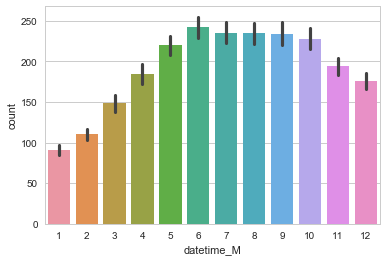

In [35]:
sns.barplot(x="datetime_M",y="count", data=trainEx)

In [41]:
sns.barplot(x="datetime_YM",y="count", data=trainEx)

ValueError: Could not interpret input 'datetime_YM'

### Cols Touch

In [5]:
train["weather_1"]= (train["weather"]==1)
train["weather_2"]= (train["weather"]==2)
train["weather_3"]= (train["weather"]==3)
train["weather_4"]= (train["weather"]==4)

In [6]:
train["atemp_LL"]= (train["atemp"]<10) 
train["atemp_L"]= ((train["atemp"]>=10) & (train["atemp"]<20))
train["atemp_M"]= ((train["atemp"]>=20) & (train["atemp"]<30))
train["atemp_H"]= ((train["atemp"]>=30) & (train["atemp"]<40))
train["atemp_HH"]= (train["atemp"]>=40)

In [7]:
test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [8]:
# # math.floor 안 되고, /10 했을때 결과 별로
# train["humidity10"]= (train["humidity"]/10)
# test["humidity10"]= (test["humidity"]/10)

atemp: 체감온도.
datetime은 나중에 더 유용하게 쓸거고, 이거 외엔 index로 쓸만한 열이 없음

In [ ]:
train["datetime_Y"] = train["datetime"].dt.year
train["datetime_M"] = train["datetime"].dt.month
train["datetime_D"] = train["datetime"].dt.day
train["datetime_h"] = train["datetime"].dt.hour
# train["datetime_m"] = train["datetime"].dt.minute
# train["datetime_s"] = train["datetime"].dt.second

In [45]:
del(train["datetime_m"])
del(train["datetime_s"])

In [52]:
train[["count","atemp_LL","atemp_L","atemp_M","atemp_H","atemp_HH"]]
train.to_csv("data/train_try5.csv", index=False)

### train

In [ ]:
# feature_names=["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]
feature_names=["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]

feature_names

In [ ]:
X_train= train[feature_names]

print(X_train.shape)
X_train.head()

In [ ]:
X_test= test[feature_names]

print(X_test.shape)
X_test.head()

In [ ]:
label_name= "count"
y_train= train[label_name]

print(y_train.shape)
y_train.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=37) #모델개선 정도를 알아보려고 특정 랜덤을 고정시키는것

model

### score

In [ ]:
from sklearn.model_selection import cross_val_score
# score= cross_val_score(model, X_train, y_train, cv=20).mean() #cv 기본값은 3
score= cross_val_score(model, X_train, y_train, cv=20, scoring="neg_mean_absolute_error").mean() #0에 근접하도록 만듦

# score= -1*score

print("Score= {0:.5f}".format(score))
#0 에 근접할지만 알면 되고, +- 는 중요치 않아. sclearen의 역사랑 얽혀있는거

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions= model.predict(X_test)
print(predictions.shape)
predictions[0:10]
#0시, 1시, ...

### submit

In [ ]:
#캐글 제출형식으로 만들기
submit= pd.read_csv("data/sampleSubmission.csv")
print(submit.shape)
submit.head()

In [ ]:
#예측값 넣기
submit["count"]= predictions
print(submit.shape)
submit.head()

In [ ]:
# #파일 저장
# # submit.to_csv("data/baseline_script.csv") # 이대로 넣으면 판다가 기본 인덱스 0~n 을 넣어버림
# submit.to_csv("data/baseline_script_try001.csv", index=False)

decision tree: score: 1.62927
#.
random forest: 1.39409

값이 작을수록 좋은것

판단기준이지만, 맹신 ㄴㄴ. 이게 떨어지는데 캐글값이 올라가는 경우도 있다